In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np

In [11]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [26]:

train_data = train_datagen.flow_from_directory(
    "./face_data/Train",
    target_size=(150,150),
    color_mode="grayscale",
    batch_size=20,
    class_mode='binary'

)
test_data =test_datagen.flow_from_directory(
    "./face_data/Test",
    target_size=(150,150),
    color_mode="grayscale",
    batch_size=20,
    class_mode='binary'

)

Found 220 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [27]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD, Adam,RMSprop

In [28]:

model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

In [30]:
hist = model.fit_generator(train_data,epochs=15,verbose=1,validation_data = test_data)
# hist

Epoch 1/15
11/11 [==============================] - 5s 445ms/step - loss: 2.6423 - acc: 0.6056 - val_loss: 0.8474 - val_acc: 0.6500
Epoch 2/15
11/11 [==============================] - 3s 276ms/step - loss: 1.1407 - acc: 0.5961 - val_loss: 1.3330 - val_acc: 0.6000
Epoch 3/15
11/11 [==============================] - 3s 292ms/step - loss: 0.7540 - acc: 0.6596 - val_loss: 0.4277 - val_acc: 0.7500
Epoch 4/15
11/11 [==============================] - 3s 250ms/step - loss: 0.6024 - acc: 0.7732 - val_loss: 0.4957 - val_acc: 0.7750
Epoch 5/15
11/11 [==============================] - 3s 249ms/step - loss: 0.6586 - acc: 0.8252 - val_loss: 0.3844 - val_acc: 0.7750
Epoch 6/15
11/11 [==============================] - 3s 256ms/step - loss: 0.6398 - acc: 0.8452 - val_loss: 0.5832 - val_acc: 0.7500
Epoch 7/15
11/11 [==============================] - 3s 246ms/step - loss: 0.2366 - acc: 0.8945 - val_loss: 0.9926 - val_acc: 0.6750
Epoch 8/15
11/11 [==============================] - 3s 249ms/step - loss: 0.

In [31]:

model.predict(test_data)


array([[9.9978328e-01],
       [9.9998903e-01],
       [9.9868089e-01],
       [9.9260646e-01],
       [9.6553117e-01],
       [2.0656234e-01],
       [9.9989402e-01],
       [6.6227007e-01],
       [9.9851960e-01],
       [8.7394118e-01],
       [9.9926442e-01],
       [3.8617849e-04],
       [8.1007361e-01],
       [9.9865413e-01],
       [9.4853151e-01],
       [9.8789722e-01],
       [3.8540006e-02],
       [9.9625862e-01],
       [2.3163232e-01],
       [9.9999976e-01],
       [8.4199464e-01],
       [7.5021130e-01],
       [3.3917272e-01],
       [1.2765080e-02],
       [2.2047102e-02],
       [1.7715991e-03],
       [4.0698782e-01],
       [9.9857432e-01],
       [9.8679316e-01],
       [9.9597323e-01],
       [9.6999174e-01],
       [9.8504812e-02],
       [5.6498641e-01],
       [4.1059238e-01],
       [5.3597420e-02],
       [5.2282572e-02],
       [9.9993420e-01],
       [6.4907968e-03],
       [9.9494755e-01],
       [9.9647665e-01]], dtype=float32)

In [44]:
np.where(model.predict(test_data)>0.5,"Tom_cruise","Taylor_Swift")


array([['Tom_cruise'],
       ['Tom_cruise'],
       ['Tom_cruise'],
       ['Tom_cruise'],
       ['Tom_cruise'],
       ['Taylor_Swift'],
       ['Tom_cruise'],
       ['Tom_cruise'],
       ['Tom_cruise'],
       ['Tom_cruise'],
       ['Tom_cruise'],
       ['Taylor_Swift'],
       ['Tom_cruise'],
       ['Tom_cruise'],
       ['Tom_cruise'],
       ['Tom_cruise'],
       ['Taylor_Swift'],
       ['Tom_cruise'],
       ['Taylor_Swift'],
       ['Tom_cruise'],
       ['Tom_cruise'],
       ['Tom_cruise'],
       ['Taylor_Swift'],
       ['Taylor_Swift'],
       ['Taylor_Swift'],
       ['Taylor_Swift'],
       ['Taylor_Swift'],
       ['Tom_cruise'],
       ['Tom_cruise'],
       ['Tom_cruise'],
       ['Tom_cruise'],
       ['Taylor_Swift'],
       ['Tom_cruise'],
       ['Taylor_Swift'],
       ['Taylor_Swift'],
       ['Taylor_Swift'],
       ['Tom_cruise'],
       ['Taylor_Swift'],
       ['Tom_cruise'],
       ['Tom_cruise']], dtype='<U12')

In [43]:
image_path="./face_data/Train/Tom_Cruise/Tom Cruise102_1026.jpg"

image = tf.keras.preprocessing.image.load_img(image_path,color_mode="grayscale", target_size=(150,150))

input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.

np.where(model.predict(input_arr)>0.5,"Tom_cruise","Taylor_Swift")


array([['Tom_cruise']], dtype='<U12')

In [45]:
image_path="./face_data/Train/Taylor_Swift/Taylor Swift44_4644.jpg"

image = tf.keras.preprocessing.image.load_img(image_path,color_mode="grayscale", target_size=(150,150))

input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.

np.where(model.predict(input_arr)>0.5,"Tom_cruise","Taylor_Swift")

array([['Taylor_Swift']], dtype='<U12')

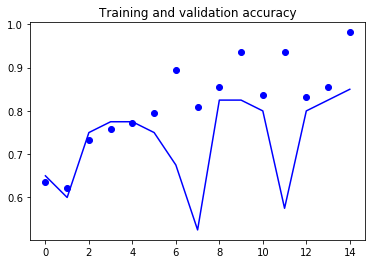

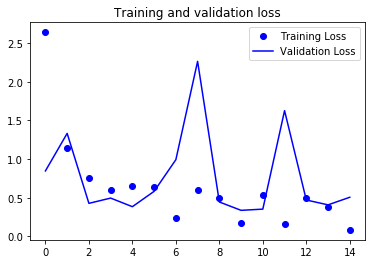

In [34]:
import matplotlib.pyplot as plt
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()